# Game theory

### Theory Recap

A **game** in strategic form is a triplet $\left(\mathcal V, \mathcal A, \{u_i\}_{i \in \mathcal V}\right)$ where:
- $\mathcal V$ is the finite set of **players**
- $\mathcal A$ is the set of **actions** available to each player. Actions $x_i \in \mathcal A$ chosen  by each player are collected in a vector $x = (x_1,x_2, \ldots, x_n)$ called **configuration** of the game. We denote the set of all configuration by $\mathcal X = \mathcal A^{\mathcal V}$.
- for each player $i \in \mathcal V$, the utility function $u_i: \mathcal X \rightarrow \mathbb{R}$ describes the **payoff** the player gets in each configuration: the utility of a player depends on its own action but also on the actions of other players.	

To each player $i \in \mathcal V$ we associate a **best response** function, which gives, for each configuration of the other players, the best action for $i$ (i.e., the actions that maximize its utility)

$$
\mathcal B_i(x_{-i})= \arg\max_{x_i \in \mathcal A} u_i(x_i,x_{-i})
$$

A **Nash equilibrium** is a configuration $x^* \in \mathcal X$ such that

$$
x_i^* \in \mathcal B_i (x^*_{-i}), \quad i \in \mathcal V
$$

A game is **potential** if there exists a potential function $\Phi: \mathcal X \rightarrow \mathbb{R}$ which describes the way the utility function of each player changes when that player unilaterally varies its action. That is, $\forall i \in \mathcal V$, $\forall x,y \in \mathcal X$

$$
x_{-i}=y_{-i} \implies u_i(y)-u_i(x) = \Phi(y)-\Phi(x)
$$

## Evolutionary game theory

In the last lecture we have studied the **Rock-Scissor-Paper game**, focusing in particular on **discrete-time asynchronous best response dynamics**. This dynamics is a Markov chain $X(t)$ with state space $\mathcal X = \mathcal A^{\mathcal V}$ coinciding with the configuration space of the game. Transitions are allowed from $x$ to $y$ if and only if i) they differ in exactly one entry $i$, and ii) $y_i \in B_i(x_{-i})$. 

We have shown that for the Rock-Scissor-Paper game, which is not potential, the dynamics admits one trapping set of configurations, which are all the strategies in which one player wins and the other loses. At each time-step, the loser (let's say Player 1) modifies his strategy to win, which implies that, after the transition, Player 2 will lose. Then, it will be Player 2 to modify his strategy to win, and so on... The dynamics thus cycles in the trapping set of those configurations.

Another related discrete-time dynamics is the **discrete-time synchronous best response dynamics**, in which at each time-step all the players update their strategy by choosing the best response to the current strategy distribution of the other players. For the RSP game this implies that if two players are playing the same strategy Rock they will both switch to Paper. The transition graph of the dynamics is completely different than the one associated to the asynchronous dynamics, e.g., the sets of configurations in which both the players play the same strategy is disconnected from the other configurations, and is therefore trapping.

The synchronous dynamics is less common and realistic than the asynchronous one, but may be useful in some applications. All of these dynamics are **myopic**, in the sense that each player update the strategy with the only goal of maximing the utility at the next step, without thinking of long-term strategies. Of course the reality may be much more complex than this, depending on the context. For instance, in two players-game both the players have to think about the fact that the other player will be using an adaptive strategy as well. Instead, in traffic, where there are a lot of players, usually each user chooses the route that minimize the travel time given the flow distribution observed in the day before, without thinking of how the other players will modify their route.

## Continuous time best response dynamics
In this section we present the continuous time best response dynamics, which is the continuous time analog of the process presented in the previous section.

Consider a game $\left(\mathcal V, \mathcal A, \{u_i\}_{i \in \mathcal V}\right)$. 

The **continuous-time asynchronous best response dynamics** is a continuous time Markov chain $X(t)$ with state space $\mathcal X= \mathcal A^{\mathcal V}$ coinciding with the configuration space of the game and transition rate matrix $\Lambda$ as follows: 

$\Lambda_{xy} = 0$ for every two configurations $x, y \in \mathcal X$ that differ in more
than one entry, and

$$
\Lambda_{xy} = \begin{cases}
|B_i(x_{-i})|^{-1} \quad &\text{if} \quad y_i \in B_i(x_{-i}) \\
0 \quad &\text{if} \quad y_i \notin B_i(x_{-i})
\end{cases}
$$

for every two configurations $x, y \in \mathcal X$ differing in entry $i$ only, i.e., such that
$x_i \neq y_i$ and $x_{-i} = y_{-i}$.

## Continuous-time best response dynamics in potential games

**Proposition**: consider a potential game, and let $\mathcal{N}$ the set of the Nash equilibria. Then, the best response dynamics $X(t)$ is such that, for every distribution of the initial configuration $X(0)$, the best response dynamics converges to $\mathcal{N}$ in finite time with probability 1. 

**Remark**: Convergence is in fact insured to a particular subset of NE, that is the one consisting of the nodes of all the sink connected components of the underlying transition graph of the Markov process. In the sequel we denote such subset as $\mathcal{N}_\infty$: it is a trapping set and actually the largest trapping set inside $\mathcal{N}$. We call $\mathcal{N}_\infty$ the set of **recurrent Nash equilibria**. Notice that in those special cases when $\mathcal{N}_\infty$ coincides with $\text{argmax}(\Phi(x))$, we actually have that the BR dynamics converges to the subset of Nash equilibria consisting of the maxima of the potential.

The continuous-time best response dynamics has a similar behaviour to discrete-time asynchronous best-response. We do not implement here the continuous-time best response dynamics. We instead focus on **continuous-time noisy best reponse dynamics**.

## Continuous-time noisy best response dynamics

We consider a **continuous time asynchronous noisy best response  dynamics** with inverse noise parameter $\eta$, i.e., a continuous time Markov chain on the configuration space $\mathcal X$ (the set of all game's configurations) with transition rates $\Lambda_{xy} = 0$ for every two configurations $x, y \in \mathcal X$ that differ in more
than one entry, and

$$
\Lambda_{xy} = \frac{\exp^{\eta u_i(y_i,x_{-i})}}{\sum_{a \in \mathcal A} \exp^{\eta u_i(a,x_{-i})} }
$$

for every two configurations $x, y \in \mathcal X$ differing in entry $i$ only, i.e., such that
$x_i \neq y_i$ and $x_{-i} = y_{-i}$.

Note that the probability that a player chooses a certain strategy $x_i$ is increasing in the payoff associated to that strategy. In particular,

- if $\eta=0$, the players choose strategies independently of the associated payoff (infinite noise, the game basically disappears), i.e., for every two configurations $x, y \in \mathcal X$ differing in entry $i$ only, i.e., such that
$x_i \neq y_i$ and $x_{-i} = y_{-i}$,

$$
\Lambda_{xy} = \frac{1}{|\mathcal{A}|}
$$

- if $\eta \to + \infty$, then the players randomize among optimal strategies, and assign probability $0$ to suboptimal ones (similar to best-response).

## Continuous-time noisy best response dynamics in potential games

The transition graph of the NBR is strongly connected for each value of $\eta$, i.e., from every configuration of strategies there is a non-null probability to reach any other configuration of strategies. In particular, for potential games, the NBR admits an invariant distribution

$$
\pi_x = \frac{e^{\eta \Phi(x)}}{Z_\eta}, \quad Z_\eta = \sum_{y\in \mathcal{X}} e^{\eta \Phi(y)}.
\tag{1}
$$

This is in contrast with best-response dynamics, which in potential games admits a trapping set of Nash equilibria $\mathcal{N}_\infty$ and converge to this set with probability 1 in finite time.

Note that if $\eta \to +\infty$, the dynamics spends almost all the time in the global maximizers of the potential. However, global maximizers of the potential differ in general from $\mathcal{N}_\infty$ as defined above.

# Network games

Network games are games where players are associated to nodes of a graph $\mathcal G$ that describes the interactions among them. In particular, for each player $i\in\mathcal V$ and for each couple of configurations $x,y\in\mathcal A^{\mathcal V}$ such that $x_j=y_j$ for each $j\in\ N_i\cup\{i\}$ it holds that

$$u_i(x)=u_i(y)$$

This means that the utility of each player only depends on the actions of its neighbors in the graph $\mathcal G$.


Given an unweighted undirected graph $\mathcal G=(\mathcal V,\mathcal E,W)$ we can construct a network game on it by setting the players’ utilities to coincide with the weighted sum of the payoffs of the same symmetric two-player game played by the player simultaneously with her neighbors.

Specifically, for a symmetric two-player game with action set $\mathcal A$ and utility function $\varphi(x_1, x_2)$ we define the network game $(\mathcal V, \mathcal A, \{u_i\}_{i \in \mathcal V} )$ by setting the utility of every player $i \in \mathcal V$ as
$$
u_i(x) = \sum_{j \in \mathcal V} W_{ij}\varphi(x_i,x_j)
$$

## Exercise - continuous time NBRD for network coordination game
A binary coordination game is a symmetric $2 \times 2$-game with action set $\mathcal A = \{0,1\}$ with payoff matrix $\varphi$

|   | 0   | 1   |
|---|-----|-----|
| **0** | a,a | d,c |
| **1** | c,d | b,b |

where $a > c$ and $b > d$. The inequalities above imply that the best response for each player is to copy the action of the other player.

It is a potential game with potential $\phi$

|   | 0   | 1   |
|---|-----|-----|
| **0** | a-c | 0 |
| **1** | 0 | b-d |

Consider the **network coordination game**, obtained combining binary coordination games on the link of the following undirected graph

![network](network.png)

Recall that such network game is potential with potential function $\Phi$

$$
\Phi(x) = \frac{1}{2} \sum_{i,j} W_{ij} \phi(x_i,x_j) .
$$

1.  Simulate the dynamics with $\eta=2$ when the coordination game has the same utility value for coordination of action 0 and action 1 respectively, i.e., $a=b=1$ and $c=d=0$. Run the simulation a few times and plot the potential function as a function of time. What do you observe?
2. Simulate the dynamics when  instead $a=1$, $b=\frac{1}{2}$ and $c=d=0$. Run the simulation a few times and plot the potential function as a function of time. What do you observe?
3. If the simulation continues for a long time, will the probability for different configurations converge towards some specific values? In that case, how can these be computed?
4. Compute the ratio between the probability that after a long time (i.e., in stationarity) all nodes choose action 1 and the probability that all nodes choose action 0, both for case **1** and case **2**. Does this seem to agree with your simulations?
5. Compute the ratio between the probability that after a long time (i.e., in stationarity) one node chooses action 1 and the rest choose action 0, and the probability that all nodes choose action 0, both for case **1** and case **2**.


### Solution
#### Step 1
> Simulate the dynamics when the coordination game has the same utility value for coordination of action 0 and action 1 respectively, i.e., $a=b=1$ and $c=d=0$. Run the simulation a few times and plot the potential function as a function of time. What do you observe?

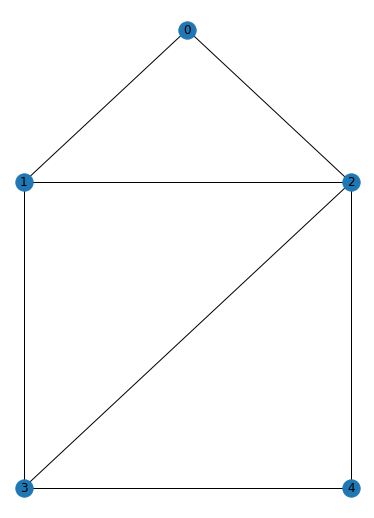

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

# Construct the undirected graph as shown in the picture
G = nx.Graph()
G.add_nodes_from(range(5))
G.add_edges_from([
    (0,1),(0,2),
    (1,2),(1,3),
    (2,3),(2,4),
    (3,4)
])

plt.figure(figsize=(5,7))
pos = {3: (0, 0), 4: (1, 0), 1: (0, 1), 2: (1, 1), 0: (0.5, 1.5)}
nx.draw(G, pos=pos, with_labels=True)

In [2]:
# Define the network coordination game

# number of nodes in G = number of players in the game
n_players = len(G)
# utility values
a = 1
b = 1
c = 0
d = 0
# utility matrix for the 2x2 coordination game
phi = np.array([[a,d],
                [c,b]])
# the potential function of the 2x2 coordination game
pot = np.array([[a-c,0],
                [0,b-d]])
# inverse noise parameter
eta = 2
# available actions
actions = [0,1]
n_actions = len(actions)
# adjacency matrix
W = nx.convert_matrix.to_numpy_matrix(G)

def utility(player, x, phi):
    result = 0
    for other_player in G.neighbors(player):
         result += phi[x[player], x[other_player]]
    return result

In [3]:
# Define the noisy best response dynamics

# Initialize transition rates matrix
n_config = n_actions**n_players
Lambda = sp.sparse.lil_matrix((n_config,n_config))

# Number of actions for each player
n_states =tuple(n_actions for _ in range(n_players))

# Fill transition rates matrix
for x_id in range(n_config):
    x = np.unravel_index(x_id,shape=n_states)
    x = np.array(x)
    for player in range(n_players):
        # compute utilities gained by `player` for each of its possible actions
        # while the other players are in the current configuration x
        utilities = np.zeros(n_actions)
        for action in actions:
            y = np.array(x)
            y[player] = action
            utilities[action] = utility(player,y,phi)
        exp_utilities = np.exp(eta*utilities)
        for action in actions:
            if action == x[player]:
                continue
            y = np.array(x)
            y[player] = action
            y_id = np.ravel_multi_index(tuple(y), dims = n_states)
            Lambda[x_id, y_id] += exp_utilities[action] / np.sum(exp_utilities)

In [4]:
# Simulate the continuous time Markov chain with 2nd approach: local clocks
w = np.sum(Lambda, axis=1)

# reshape w
w = np.array(w.T)[0]
for x, weight in enumerate(w):
    # add selfloop if a configuration is a sink, otherwise D is not well defined
    if weight == 0:
        Lambda[x,x] = 1
        w[x] = 1
D = np.diag(w)
P = np.linalg.inv(D) @ Lambda

# number of iterations
n_steps = 100

states = np.zeros(n_steps, dtype=int)
# initial configuration
x = np.random.choice(actions, size = n_players)
x_id = np.ravel_multi_index(tuple(x), dims = n_states)
states[0] = x_id

transition_times = np.zeros(n_steps)
t_next = -np.log(np.random.rand())/w[states[0]]

P_cum = np.cumsum(P, axis=1)

for i in range(1,n_steps):
    states[i] = np.argwhere(P_cum[states[i-1]] > np.random.rand())[0]
    transition_times[i] = transition_times[i-1] + t_next
    t_next = -np.log(np.random.rand())/w[states[i]]

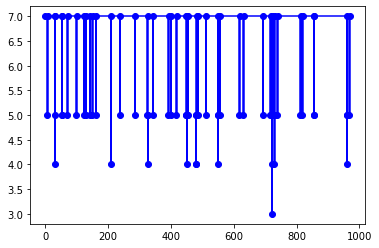

In [5]:
# Compute and plot the evolution of the potential along the simulated 
# path of the chain

# store the potential value at each step of the simulation
potentials = np.zeros(n_steps)
for step in range(n_steps):
    x_id = states[step]
    x = np.array(np.unravel_index(x_id, shape = n_states))
    for i, j in G.edges:
        potentials[step] += pot[x[i],x[j]]

plt.step(transition_times, potentials, 'bo-', where="post");

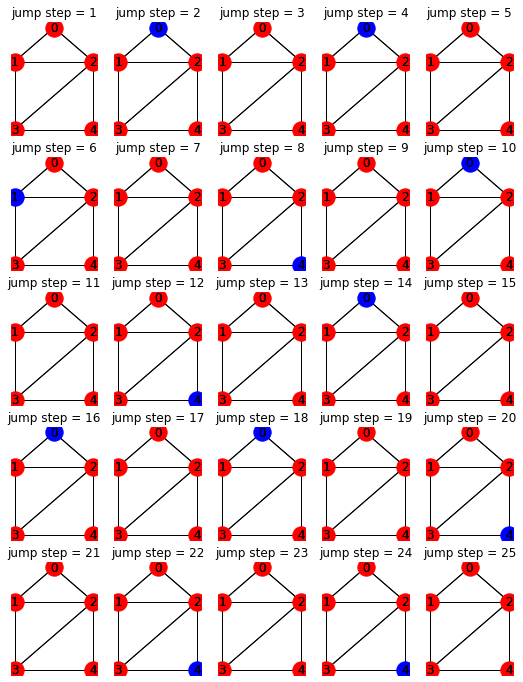

In [6]:
# To better understand the process, visualize the 
# evolution of the game's configuration in time

import matplotlib.pyplot as plt

# Plot the evolution of the game's configurations
fig = plt.figure(figsize=(9,12))
for t in range(0,min(n_steps,25)):
    plt.subplot(5,5,t+1)
    x_id = states[t]
    x = np.array(np.unravel_index(x_id, shape = n_states))
    nx.draw(G,
        pos = pos,
        with_labels=True,
        nodelist=np.argwhere(x==0).T[0].tolist(),
        node_color = 'r')
    nx.draw(G,
        pos = pos,
        with_labels=True,
        nodelist=np.argwhere(x==1).T[0].tolist(),
        node_color = 'b')
    plt.title('jump step = {0}'.format(t+1))

We can see that the potential during most of the
time is at its maximum value, corresponding to all nodes choosing the
same action. By repeating the simulation, it seems like all nodes tend
to end up in the same state after long time, independently of the initialization. The asymptotic state consists equally often in that all nodes
choose action 0 as that all nodes choose action 1.

We know from the theory that the noisy best response dynamics operates a selection among the NE and concentrates, in the small noise limit, most of the probability of its invariant distribution in the subset of those Nash equilibria that correspond to the set of potential maximizers 

$$\arg \max_{x \in \mathcal X} \Phi(x)$$ 

With the current choice for $a,b,c,d$ the maximum value of the potential $\Phi$ is realized by both the all-one and all-zero configurations.

In this example we have a fixed noisy parameter $\eta = 2$ but we are still able to observe that the dynamics spends most part of the time in global maxima of the potential. This can be evaluated for instance by computing the average of the potential function along the trajectory.

In [7]:
intervals = np.diff(transition_times, n=1, append = transition_times[-1] + t_next)
avg_potential = np.sum(intervals*potentials)/(transition_times[-1] + t_next)
print("Average potential:", avg_potential)

Average potential: 6.897579081841284


Try to change the noise parameter and see how the dynamics behaves.

If $\eta=0$, then:
- the average potential is about 3.5, because transitions are random, the number of links is 7, and the potential counts the number of (undirected) links between nodes with same action. If the nodes choose randomly their state, in expectation the number of links between nodes with same action (and thus the potential) is 3.5.

If $\eta=5$, then:
- the dynamics spends most of the time in consensus configuration, thus the potential tends to 7, all the links connect nodes with same action;
- the time between transitions grows, because it is unlikely that an agent modifies its action from a Nash equilibrium to achieve a lower payoff. Notice that the transition times grow only when the transition descends the potential.

#### Step 2
> Simulate the dynamics when  instead $a=1$, $b=\frac{1}{2}$ and $c=d=0$. Run the simulation a few times and plot the potential function as a function of time. What do you observe?

The same code as previously can be reused, by only changing the parameter $b$. The simulations and the evolution of the potential values along it behave very similarly, with the difference that, among the states in which all nodes choose the same action, state $(0,\ldots,0)$ is much more frequent than $(1,\ldots,1)$. Even if all nodes are initialized to choose action 1, with high probability after a while they will all choose action 0 instead. This happens since with the current choice of $a,b,c,d$ the global maximum of the potential $\Phi$ is realized by the all-zero configuration.

**Remark**: note however that, in contrast with the best response dynamics, the noisy best response dynamics still will escape from global maximizers of the potential ('all zeros' states in this example), because the transition graph is irreducible.

In [8]:
# Define the network coordination game

# number of nodes in G = number of players in the game
n_players = len(G)
# utility values
a = 1
b = 1/2
c = 0
d = 0
# utility matrix for the 2x2 coordination game
phi = np.array([[a,d],
                [c,b]])
# the potential function of the 2x2 coordination game
pot = np.array([[a-c,0],
                [0,b-d]])
# inverse noise parameter
eta = 2
# available actions
actions = [0,1]
n_actions = len(actions)
# adjacency matrix
W = nx.convert_matrix.to_numpy_matrix(G)

def utility(player, x, phi):
    result = 0
    for other_player in G.neighbors(player):
         result += phi[x[player], x[other_player]]
    return result

In [9]:
# Define the noisy best response dynamics

# Initialize transition rates matrix
n_config = n_actions**n_players
Lambda = sp.sparse.lil_matrix((n_config,n_config))

# Number of actions for each player
n_states =tuple(n_actions for _ in range(n_players))

# Fill transition rates matrix
for x_id in range(n_config):
    x = np.unravel_index(x_id,shape=n_states)
    x = np.array(x)
    for player in range(n_players):
        # compute utilities gained by `player` for each of its possible actions
        # while the other players are in the current configuration x
        utilities = np.zeros(n_actions)
        for action in actions:
            y = np.array(x)
            y[player] = action
            utilities[action] = utility(player,y,phi)
        exp_utilities = np.exp(eta*utilities)
        for action in actions:
            if action == x[player]:
                continue
            y = np.array(x)
            y[player] = action
            y_id = np.ravel_multi_index(tuple(y), dims = n_states)
            Lambda[x_id, y_id] += exp_utilities[action] / np.sum(exp_utilities)

In [10]:
# Simulate the continuous time Markov chain with 2nd approach: local clocks

w = np.sum(Lambda, axis=1)
w = np.array(w.T)[0]
for x, weight in enumerate(w):
    if weight == 0:
        Lambda[x,x] = 1
        w[x] = 1
D = np.diag(w)
P = np.linalg.inv(D) @ Lambda

# number of iterations
n_steps = 100

states = np.zeros(n_steps, dtype=int)
# initial configuration
x = np.random.choice(actions, size = n_players)
x_id = np.ravel_multi_index(tuple(x), dims = n_states)
states[0] = x_id

transition_times = np.zeros(n_steps)
t_next = -np.log(np.random.rand())/w[0]

P_cum = np.cumsum(P, axis=1)

for i in range(1,n_steps):
    states[i] = np.argwhere(P_cum[states[i-1]] > np.random.rand())[0]
    transition_times[i] = transition_times[i-1] + t_next
    t_next = -np.log(np.random.rand())/w[states[i]]

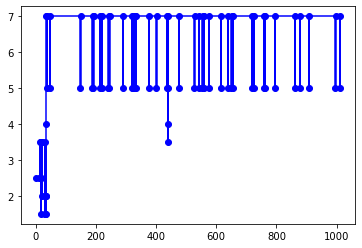

In [11]:
# Compute and plot the evolution of the potential along the simulated 
# path of the chain

# store the potential value at each step of the simulation
potentials = np.zeros(n_steps)
for step in range(n_steps):
    x_id = states[step]
    x = np.array(np.unravel_index(x_id, shape = n_states))
    for i, j in G.edges:
        potentials[step] += pot[x[i],x[j]]

plt.step(transition_times, potentials, 'bo-', where="post");

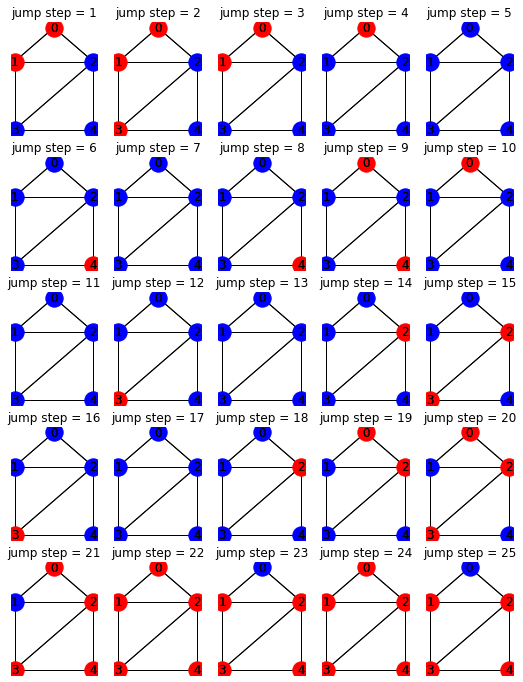

In [12]:
# To better understand the process, visualize the 
# evolution of the game's configuration in time

import matplotlib.pyplot as plt

# Plot the evolution of the game's configurations
fig = plt.figure(figsize=(9,12))
for t in range(0,min(n_steps,25)):
    plt.subplot(5,5,t+1)
    x_id = states[t]
    x = np.array(np.unravel_index(x_id, shape = n_states))
    nx.draw(G,
        pos = pos,
        with_labels=True,
        nodelist=np.argwhere(x==0).T[0].tolist(),
        node_color = 'r')
    nx.draw(G,
        pos = pos,
        with_labels=True,
        nodelist=np.argwhere(x==1).T[0].tolist(),
        node_color = 'b')
    plt.title('jump step = {0}'.format(t+1))

**A few observations**

- Even if the noisy best response dynamics falls in the global maximum configuration (all zeros), still it will escape from this configuration, for any value of $\eta$, because the dynamics is ergodic. This is a crucial observation, which distinguishes the noisy best response from the best response.

- Also the 'all ones' configuration is a Nash equilibrium, and thus a local maximum of the potential. If $\eta$ is large and the system falls in the local maximum, it takes a lot to escape this configuration. This is due to the fact that the dynamics becomes "less ergodic" as $\eta$ grows large, in the sense that it takes a lot to escape from Nash equilibria, and in general it takes a lot to descend the potential, because the players become more rational as $\eta$ grows.

- In mathematical terms, this statement may be rephrased as follows: "as $\eta$ grows large, the invariant distribution of the dynamics tends to concentrate most of the mass on the maximizers of the potential, but it takes more time to relax to the invariant distribution." This is also related to the fact that the transition graphs becomes less connected as $\eta$ grows (because the probability of an agent choosing a suboptimal strategy tends to $0$)

It is instructive to simulate the dynamics from the Nash equilibrium 'all ones' with a large value of $\eta$.

In [13]:
# Define the network coordination game

# number of nodes in G = number of players in the game
n_players = len(G)
# utility values
a = 1
b = 1/2
c = 0
d = 0
# utility matrix for the 2x2 coordination game
phi = np.array([[a,d],
                [c,b]])
# the potential function of the 2x2 coordination game
pot = np.array([[a-c,0],
                [0,b-d]])
# inverse noise parameter
eta = 10
# available actions
actions = [0,1]
n_actions = len(actions)
# adjacency matrix
W = nx.convert_matrix.to_numpy_matrix(G)

def utility(player, x, phi):
    result = 0
    for other_player in G.neighbors(player):
         result += phi[x[player], x[other_player]]
    return result

In [14]:
# Define the noisy best response dynamics

# Initialize transition rates matrix
n_config = n_actions**n_players
Lambda = sp.sparse.lil_matrix((n_config,n_config))

# Number of actions for each player
n_states =tuple(n_actions for _ in range(n_players))

# Fill transition rates matrix
for x_id in range(n_config):
    x = np.unravel_index(x_id,shape=n_states)
    x = np.array(x)
    for player in range(n_players):
        # compute utilities gained by `player` for each of its possible actions
        # while the other players are in the current configuration x
        utilities = np.zeros(n_actions)
        for action in actions:
            y = np.array(x)
            y[player] = action
            utilities[action] = utility(player,y,phi)
        exp_utilities = np.exp(eta*utilities)
        for action in actions:
            if action == x[player]:
                continue
            y = np.array(x)
            y[player] = action
            y_id = np.ravel_multi_index(tuple(y), dims = n_states)
            Lambda[x_id, y_id] += exp_utilities[action] / np.sum(exp_utilities)

In [15]:
# Simulate the continuous time Markov chain with 2nd approach: local clocks

w = np.sum(Lambda, axis=1)
w = np.array(w.T)[0]
for x, weight in enumerate(w):
    if weight == 0:
        Lambda[x,x] = 1
        w[x] = 1
D = np.diag(w)
P = np.linalg.inv(D) @ Lambda

# number of iterations
n_steps = 25

# initial configuration all ones
x_id = n_config-1
states[0] = x_id

transition_times = np.zeros(n_steps)
t_next = -np.log(np.random.rand())/w[0]

P_cum = np.cumsum(P, axis=1)

for i in range(1,n_steps):
    states[i] = np.argwhere(P_cum[states[i-1]] > np.random.rand())[0]
    transition_times[i] = transition_times[i-1] + t_next
    t_next = -np.log(np.random.rand())/w[states[i]]

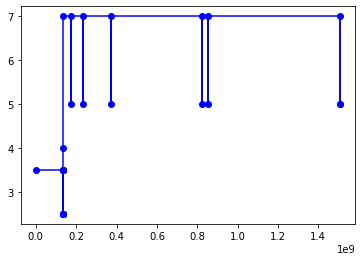

In [16]:
# Compute and plot the evolution of the potential along the simulated 
# path of the chain

# store the potential value at each step of the simulation
potentials = np.zeros(n_steps)
for step in range(n_steps):
    x_id = states[step]
    x = np.array(np.unravel_index(x_id, shape = n_states))
    for i, j in G.edges:
        potentials[step] += pot[x[i],x[j]]

plt.step(transition_times, potentials, 'bo-', where="post");

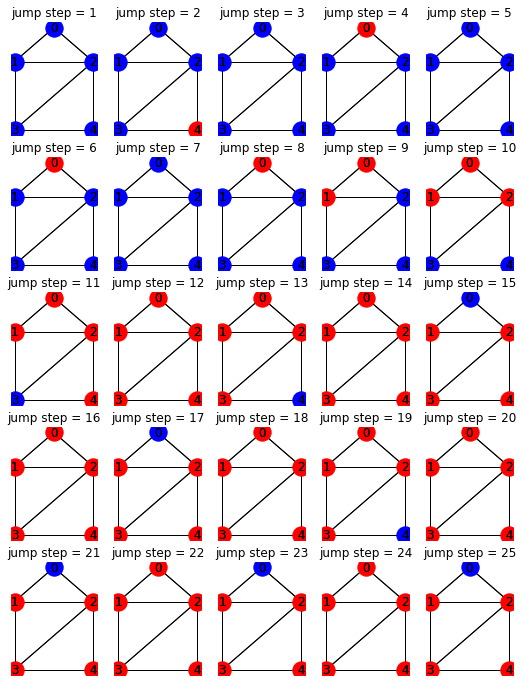

In [17]:
# To better understand the process, visualize the 
# evolution of the game's configuration in time

import matplotlib.pyplot as plt

# Plot the evolution of the game's configurations
fig = plt.figure(figsize=(9,12))
for t in range(0,min(n_steps,25)):
    plt.subplot(5,5,t+1)
    x_id = states[t]
    x = np.array(np.unravel_index(x_id, shape = n_states))
    nx.draw(G,
        pos = pos,
        with_labels=True,
        nodelist=np.argwhere(x==0).T[0].tolist(),
        node_color = 'r')
    nx.draw(G,
        pos = pos,
        with_labels=True,
        nodelist=np.argwhere(x==1).T[0].tolist(),
        node_color = 'b')
    plt.title('jump step = {0}'.format(t+1))

Observe that for a very long time interval the dynamics does not escape from the 'all ones' Nash equilibrium. However, as the simulation is observed for even longer times, the time spent in the 'all ones' configuration is expected to be a negligible fraction of the total time (as shown in the next step). This shows that for large $\eta$ it takes a lot to escape from local maxima and to relax to the invariant distribution $\pi$. If one considers instead the BR dynamics, the 'all ones' configuration belongs to $\mathcal{N}_\infty$ and the dynamics does not escape from that configuration.

#### Step 3
> If the simulation continues for a long time, will the probability to be in the different configurations converge towards some specific values? In that case, how can these be computed?

According to the theory about noisy best response dynamics, this type of dynamics is, for any choice of $\eta > 0$, an irreducible reversible Markov chain with invariant probability distribution
$$
\pi_x = \frac{e^{\eta \Phi(x)}}{Z_\eta}, \quad Z_\eta = \sum_{y\in \mathcal{X}} e^{\eta \Phi(y)}.
\tag{1}
$$

Compute the values of $\pi$.

In [18]:
# TO DO

#### Step 4
> Compute the ratio between the probability that after a long time (i.e., in stationarity) all nodes choose action 1 and the probability that all nodes choose action 0, both for case **1** and case **2**. Does this seem to agree with your simulations?

According to (1), we have that 
$$
\frac{\pi_{(1,1,1,1,1)}}{\pi_{(0,0,0,0,0)}} = \frac{e^{\eta \Phi(1,1,1,1,1)}}{e^{\eta \Phi(0,0,0,0,0)}}.
$$
We can thus compute the result according to the following code: 

In [19]:
print("Case 1:")
# utility values
a = 1
b = 1
c = 0
d = 0
# the potential function of the 2x2 game
eta = 2
pot = np.array([[a-c,0],
                [0,b-d]])
x_0 = [0 for node in G]
potential_0 = 0
for i, j in G.edges:
    potential_0 += 0.5*pot[x_0[i],x_0[j]]

x_1 = [1 for node in G]
potential_1 = 0
for i, j in G.edges:
    potential_1 += 0.5*pot[x_1[i],x_1[j]]

probability_ratio_1_over_0 = np.exp(eta*potential_1) / np.exp(eta*potential_0)
print("The ratio between the probability of configuration 'all ones' and configuration 'all zeros' is", probability_ratio_1_over_0)

print("Case 2:")

# utility values
a = 1
b = 1/2
c = 0
d = 0
# the potential function of the 2x2 game
pot = np.array([[a-c,0],
                [0,b-d]])

x_0 = [0 for node in G]
potential_0 = 0
for i, j in G.edges:
    potential_0 += pot[x_0[i],x_0[j]]

x_1 = [1 for node in G]
potential_1 = 0
for i, j in G.edges:
    potential_1 += pot[x_1[i],x_1[j]]

probability_ratio_1_over_0 = np.exp(eta*potential_1) / np.exp(eta*potential_0)
print("The ratio between the probability of configuration 'all ones' and configuration 'all zeros' is", probability_ratio_1_over_0)


Case 1:
The ratio between the probability of configuration 'all ones' and configuration 'all zeros' is 1.0
Case 2:
The ratio between the probability of configuration 'all ones' and configuration 'all zeros' is 0.0009118819655545161


Check if this result agree with your simulations by estimating $\pi$ for case **1** and **2** by measuring the time spent in each configuration. Let's do a long simulation.

In [20]:
# number of nodes in G = number of players in the game
n_players = len(G)
# utility values
a = 1
b = 1/2
c = 0
d = 0
# utility matrix for the 2x2 coordination game
phi = np.array([[a,d],
                [c,b]])
# the potential function of the 2x2 coordination game
pot = np.array([[a-c,0],
                [0,b-d]])
# inverse noise parameter
eta = 2
# available actions
actions = [0,1]
n_actions = len(actions)
# adjacency matrix
W = nx.convert_matrix.to_numpy_matrix(G)

def utility(player, x, phi):
    result = 0
    for other_player in G.neighbors(player):
         result += phi[x[player], x[other_player]]
    return result

In [21]:
# Define the noisy best response dynamics

# Initialize transition rates matrix
n_config = n_actions**n_players
Lambda = sp.sparse.lil_matrix((n_config,n_config))

# Number of actions for each player
n_states =tuple(n_actions for _ in range(n_players))

# Fill transition rates matrix
for x_id in range(n_config):
    x = np.unravel_index(x_id,shape=n_states)
    x = np.array(x)
    for player in range(n_players):
        # compute utilities gained by `player` for each of its possible actions
        # while the other players are in the current configuration x
        utilities = np.zeros(n_actions)
        for action in actions:
            y = np.array(x)
            y[player] = action
            utilities[action] = utility(player,y,phi)
        exp_utilities = np.exp(eta*utilities)
        for action in actions:
            if action == x[player]:
                continue
            y = np.array(x)
            y[player] = action
            y_id = np.ravel_multi_index(tuple(y), dims = n_states)
            Lambda[x_id, y_id] += exp_utilities[action] / np.sum(exp_utilities)

In [22]:
#Simulate the continuous time Markov chain with 2nd approach: local clocks

w = np.sum(Lambda, axis=1)
w = np.array(w.T)[0]
for x, weight in enumerate(w):
    if weight == 0:
        Lambda[x,x] = 1
        w[x] = 1
D = np.diag(w)
P = np.linalg.inv(D) @ Lambda

# number of iterations
n_steps = 100000

states = np.zeros(n_steps, dtype=int)
# initial configuration
x = np.random.choice(actions, size = n_players)
x_id = np.ravel_multi_index(tuple(x), dims = n_states)
states[0] = x_id

transition_times = np.zeros(n_steps)
t_next = -np.log(np.random.rand())/w[0]

P_cum = np.cumsum(P, axis=1)

for i in range(1,n_steps):
    states[i] = np.argwhere(P_cum[states[i-1]] > np.random.rand())[0]
    transition_times[i] = transition_times[i-1] + t_next
    t_next = -np.log(np.random.rand())/w[states[i]]

In [23]:
# compute frequencies
intervals = np.diff(transition_times, n=1, append = transition_times[-1] + t_next)
frequencies = np.zeros(n_config)

for node in range(n_config):
    visits = np.argwhere(states == node)
    frequencies[node] = np.sum(intervals[visits])/(transition_times[-1] + t_next)
print("Empirical frequencies:", frequencies, "\n")

print("Fraction of time spent in configuration", np.unravel_index(n_config-1, shape = n_states), "/ Fraction of time spent in configuration", np.unravel_index(0, shape = n_states), ":", frequencies[-1]/frequencies[0])

Empirical frequencies: [9.55230003e-01 1.77517297e-02 2.40218269e-03 8.41432807e-04
 3.33081345e-04 1.21265993e-04 1.85627055e-05 1.11938640e-04
 2.37462250e-03 4.11214367e-05 1.19249395e-04 3.78204260e-05
 1.56892471e-05 7.50366906e-06 2.46884511e-05 1.14531581e-04
 1.76013503e-02 3.15289580e-04 3.61977399e-05 1.30941757e-05
 1.66079949e-04 5.43246960e-05 4.20715112e-06 4.78582228e-05
 8.81084859e-04 1.70782979e-05 4.34529679e-05 1.22072920e-05
 1.35924369e-04 5.15937157e-05 1.15507787e-04 9.59325052e-04] 

Fraction of time spent in configuration (1, 1, 1, 1, 1) / Fraction of time spent in configuration (0, 0, 0, 0, 0) : 0.0010042869763015225


#### Step 5. 
> Compute the ratio between the probability that after a long time (i.e., in stationarity) one node chooses action 1 and the rest choose action 0, and the probability that all nodes choose action 0, both for case **1** and case **2**.

Using the invariant probability distribution formula (1) again, we can compute the ratio
$$
\frac{\sum_{i \in \mathcal V} \pi_{\delta(i)}}{\pi_{(0,0,0,0,0)}}
$$
where $\delta(i)_i=1$ and $\delta(i)_j=0$, $\forall j \neq i$.

In [24]:
print("Case 1:")
# utility values
a = 1
b = 1
c = 0
d = 0
# the potential function of the 2x2 game
pot = np.array([[a-c,0],
                [0,b-d]])
x_0 = [0 for node in G]
potential_0 = 0
for i, j in G.edges:
    potential_0 += 0.5*pot[x_0[i],x_0[j]]

exp_potential_1 = 0
for player in G:
    x_1 = [0 for node in G]
    x_1[player] = 1
    potential_1 = 0
    for i, j in G.edges:
        potential_1 += 0.5*pot[x_1[i],x_1[j]]
    exp_potential_1 += np.exp(eta*potential_1)

# print(exp_potential_1)
probability_ratio_1_over_0 = exp_potential_1 / np.exp(eta*potential_0)
print("The ratio between the probability of configuration 'one one, rest zero' and configuration 'all zeros' is", probability_ratio_1_over_0)

print("Case 2:")

# utility values
a = 1
b = 1/2
c = 0
d = 0
# the potential function of the 2x2 game
pot = np.array([[a-c,0],
                [0,b-d]])

x_0 = [0 for node in G]
potential_0 = 0
for i, j in G.edges:
    potential_0 += 0.5*pot[x_0[i],x_0[j]]

exp_potential_1 = 0
for player in G:
    x_1 = [0 for node in G]
    x_1[player] = 1
    potential_1 = 0
    for i, j in G.edges:
        potential_1 += 0.5*pot[x_1[i],x_1[j]]
    exp_potential_1 += np.exp(eta*potential_1)

# print(exp_potential_1)
probability_ratio_1_over_0 = exp_potential_1 / np.exp(eta*potential_0)
print("The ratio between the probability of configuration 'one one, rest zero' and configuration 'all zeros' is", probability_ratio_1_over_0)


Case 1:
The ratio between the probability of configuration 'one one, rest zero' and configuration 'all zeros' is 0.3885603420976875
Case 2:
The ratio between the probability of configuration 'one one, rest zero' and configuration 'all zeros' is 0.3885603420976875


Even if in case 1 and 2 are different, the ratio 

$$
\frac{\sum_{i \in \mathcal V} \pi_{\delta(i)}}{\pi_{(0,0,0,0,0)}}
$$

is the same in the two cases.
This happens because the potential value of configurations $\delta(i)$ and $(0,0,0,0,0)$ does not depends on $b$, as the configurations does not contain any couple of neighboring players playing action $1$.

## On the difference between BR and NBR (in potential games)

- The NBR dynamics is irreducible, the BR is not (transitions are allowed only in the increasing direction of the potential).
- The NBR dynamics admits a unique invariant distribution. The BR converges almost surely to a sink component of Nash equilibria (called recurrent equilibria, and indicated by $\mathcal{N}_\infty$). However, $\mathcal{N}_\infty$ may in general contain multiple disconnected sets of Nash equilibria, and which one is selected depends on the initial condition and on the realization of the Markov process.
- As $\eta \to \infty$, the NBR dynamics for long times condensate its probability distribution to the global maximizers of the potential $\Phi$. However, $\mathcal{N}_\infty$ does not in general coincide with the global maximizers of the potential. The only property that can be proven is that $\mathcal{N}_\infty$ contains the global maxima of $\Phi$.

Let us comment the previous example and three other instructive examples.

In the previous example, with $a=1, b=1/2$, both the 'all ones' and 'all zeros' consensus states are Nash equilibria of the game. Both of them belong to $\mathcal{N}_\infty$. Indeed, if the configuration is $(1,1,1,1,1)$ no rational agents modify her strategy, and the BR dynamics gets stucked in that configuration. However, $\Phi(1,1,1,1,1)<\Phi(0,0,0,0,0)$, thus the NBR dynamics with $\eta \to \infty$ for long times (after relaxating to the invariant distribution $\pi$) will spent almost fraction $1$ of the total time in $(0,0,0,0,0)$. Observe that this does not mean that the configuration $(0,0,0,0,0)$ is trapping for the NBR!!! 

## Some examples

### Majority game on complete graph: $\mathcal{N}_\infty$ is equivalent to the maximizers of the potential.

The game admits two Nash equilibria, 'all ones' and 'all zeros', both of them belonging to $\mathcal{N}_\infty$ and both of them global maximizers of the potential. Thus, the BR dynamics will converge almost surely in finite time to one of the two configurations. The NBR with large $\eta$ large, observed for large times, will spent fraction 1/2 of time in 'all ones' and 1/2 in 'all zeros'.

### Majority game on barbell graph ($n \ge 3$): $\mathcal{N}_\infty$ contains the maximizers of the potential.

The game admits four Nash equilibria: 'all ones', 'all zeros', and 'all zeros/ones in first complete subgraph and all ones/zeros in the second complete graph'. The former two are global maximizers of dynamics, the latter two are not. All of them belong to $\mathcal{N}_\infty$ and no links in the transition graph exist between these four equilibria configurations under the best response dynamics. Thus, the BR dynamics will converge to one of the equilibria and will be stuck from there on. Instead, the NBR (with large $\eta$ and observation time) will spent 1/2 of the time in each of the consensus configurations, and a vanishing time in the other two equilibria.

### Minority game on complete graph (odd $n$): $\mathcal{N}_\infty$ is a connected set of equilibria.

The game admits many Nash equilibria, that can be distinguished in two classes: the class in which $(n-1)/2$ players play the first strategy, and $(n+1)/2$ players play the second strategy, and the symmetric configurations. All these equilibria are global maximizers of the potential, all of them belong to $\mathcal{N}_\infty$ and represent a connected component.
Thus, the BR dynamics will converge to this set of equilibria and continue to move between these configurations. The NBR dynamics will converge in distribution to a uniform distribution of probability on these equilibria.

### Minority game on a line ($n=4$): $\mathcal{N}_\infty \subset \mathcal{N}$.

The game admits $4$ Nash equilibria:

- (0,1,0,1);
- (1,0,1,0);
- (0,1,1,0);
- (1,0,0,1);

It is easy to show that the first two configurations belong to $\mathcal{N}_\infty$. Indeed, both the equilibria are strict (i.e., each player has a unique best-response to this configuration) and thus are sinks for the best response dynamics. It is also easy to observe that they maximize the potential.

On the other hand, the latter two equilibria do belong to $\mathcal{N}_\infty$, i.e., the best response dynamics can escape from them. Indeed, the following transition are allowed: (0,1,1,0) -> (0,0,1,0) -> (1,0,1,0). The dynamics then gets trapped in (1,0,1,0). Thus, the BR dynamics will get stuck in either (1,0,1,0) or (0,1,0,1) in finite time with probability 1.

Since the first two configurations coincide with the maximizers of the potential, the NBR (with large $\eta$, observed for long times) will spent 1/2 of the time in (0,1,0,1) and 1/2 of the time in (1,0,1,0).